<a href="https://colab.research.google.com/github/WISDOM-OSBORN/SENG-207/blob/main/diabetes_dataset_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
data=pd.read_csv("/diabetes (2).csv")

In [49]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [52]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [56]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [60]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [61]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


### This is perfect. We have not any missing values :))

In [62]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


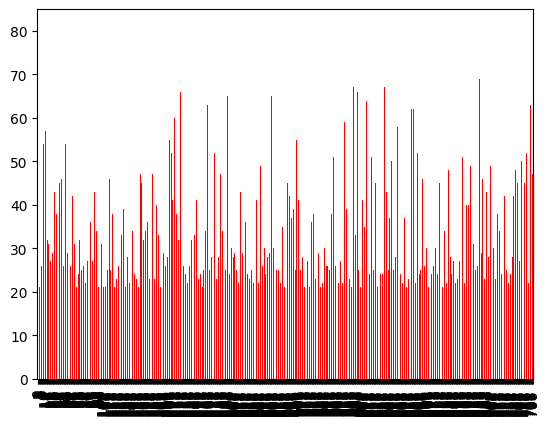

In [63]:
data.Age.plot( color='red',kind="bar")
plt.show()

###  Data Visualization


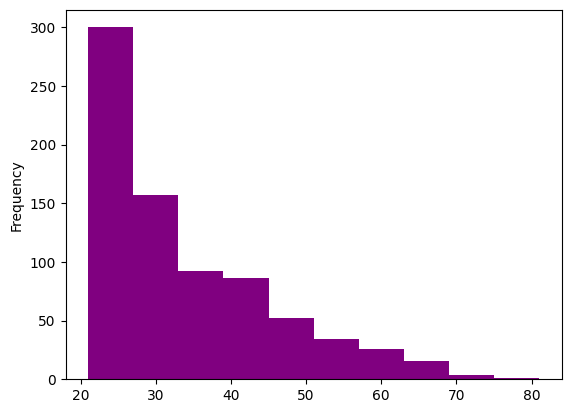

In [64]:
data.Age.plot(color="purple",kind="hist")
plt.show()

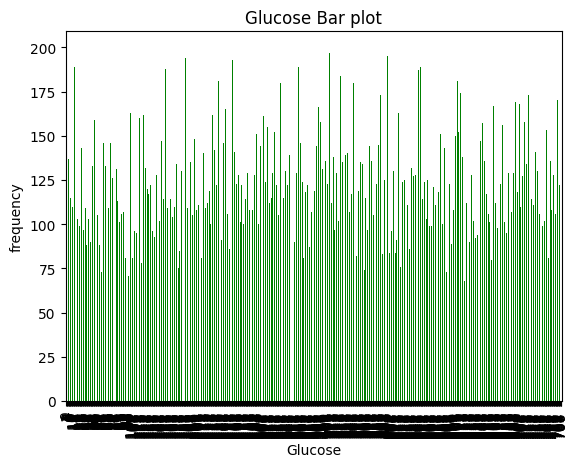

In [65]:
data.Glucose.plot(color="green",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

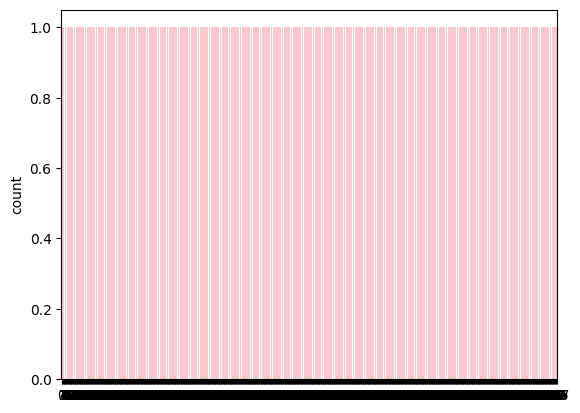

In [66]:
sns.countplot(data=data["Glucose"],color="pink")
plt.show()

<ipython-input-67-799b9e2a936f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data["Pregnancies"],palette="viridis")


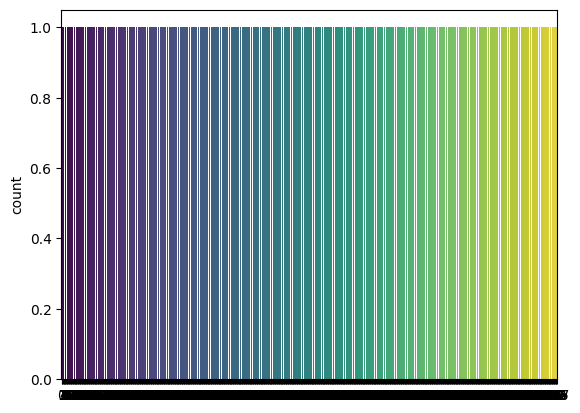

In [67]:
sns.countplot(data=data["Pregnancies"],palette="viridis")
plt.show()

<ipython-input-68-254087269bad>:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=data,x="Age",y="BMI",color="blue",split=False,cut=0,bw=.3, inner="stick")


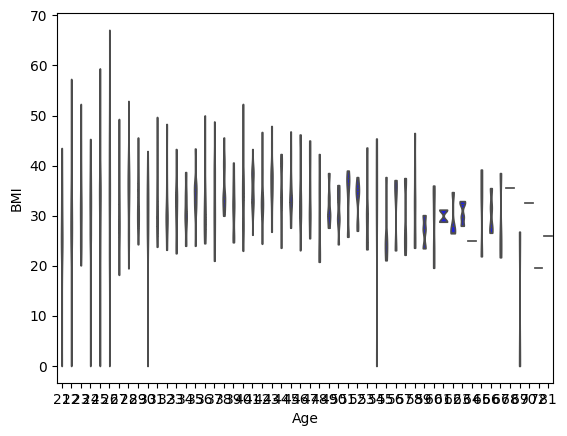

In [68]:

sns.violinplot(data=data,x="Age",y="BMI",color="blue",split=False,cut=0,bw=.3, inner="stick")
plt.show()

<ipython-input-69-44f990d8b21b>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")
<ipython-input-69-44f990d8b21b>:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")


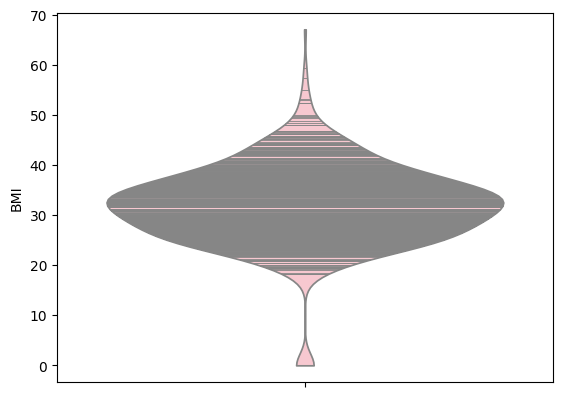

In [69]:
sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")
plt.show()

In [70]:
data.Pregnancies.value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


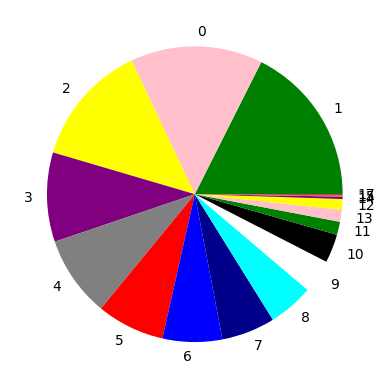

In [71]:
sizes=data.Pregnancies.value_counts().values
labels=data.Pregnancies.value_counts().index
colors=["green","pink","yellow","purple","grey","red","blue","darkblue","cyan","white","black"]
plt.pie(sizes,data=data,labels=labels,colors=colors)
plt.show()

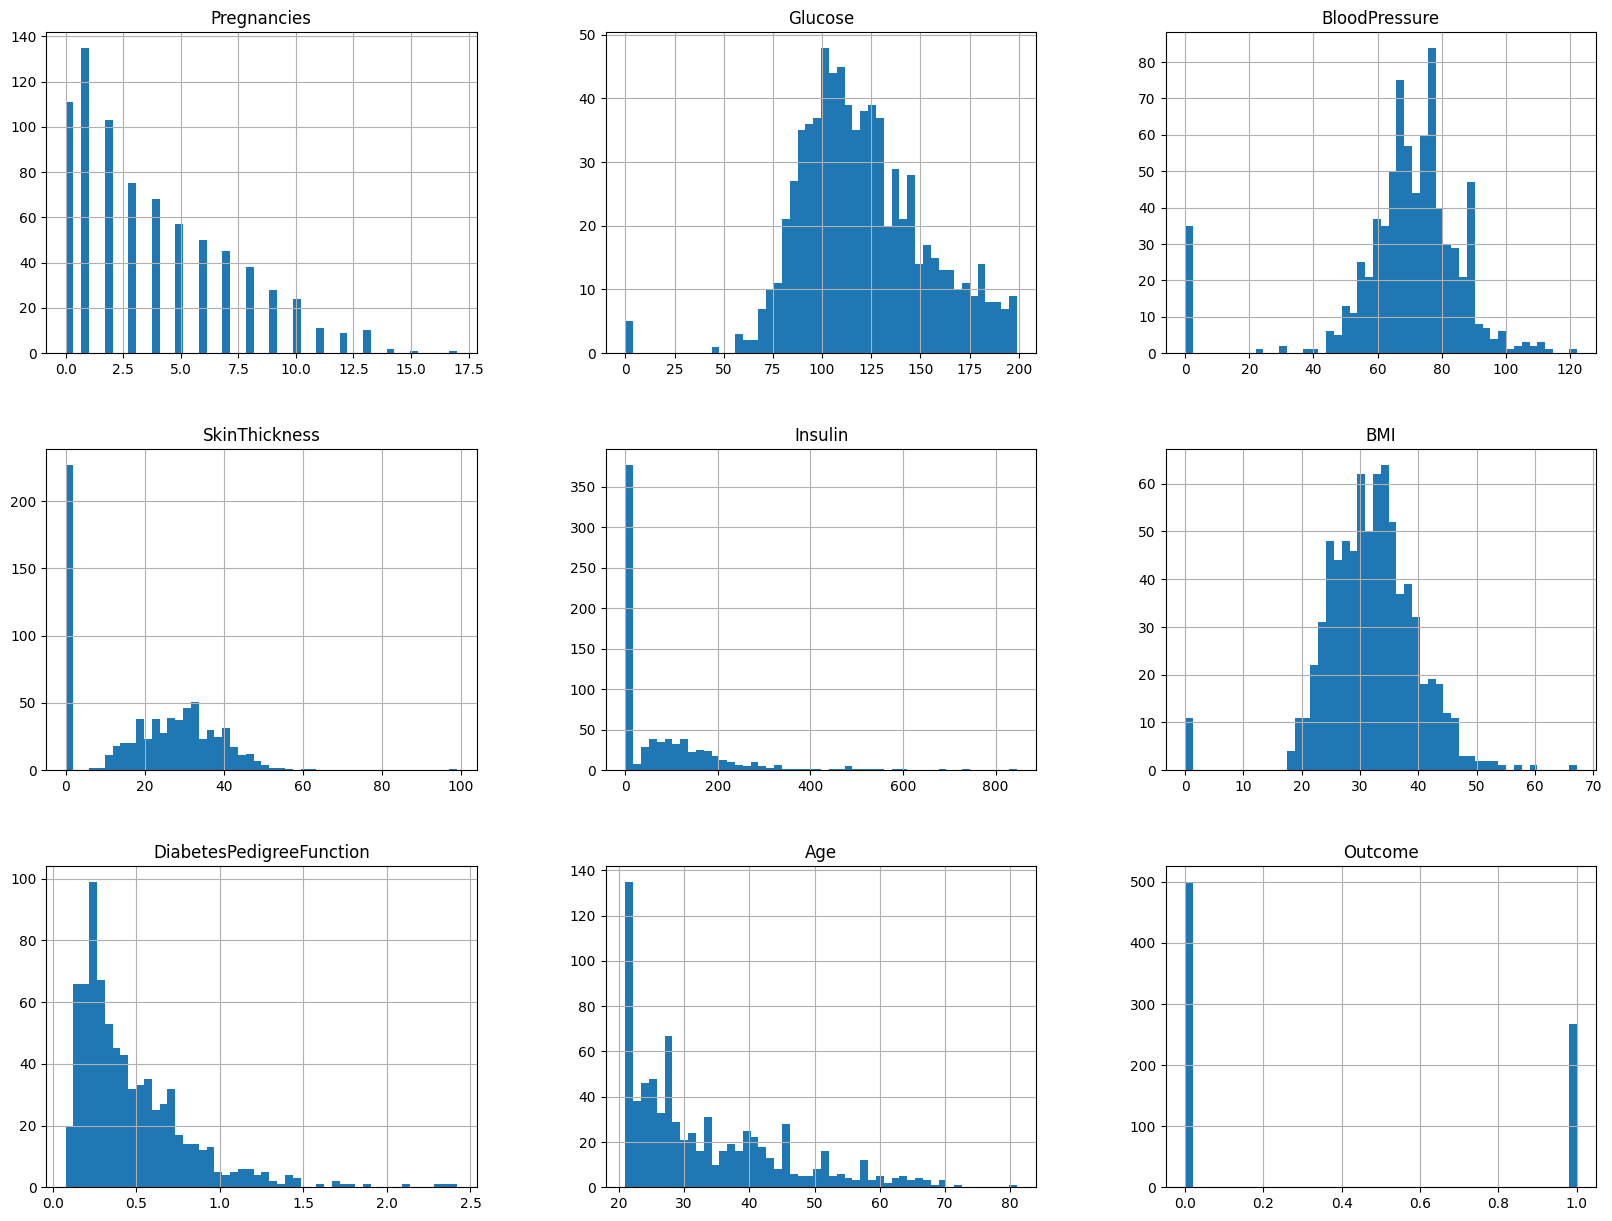

In [72]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [73]:
# let's look at the Corralation matrix of this data
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


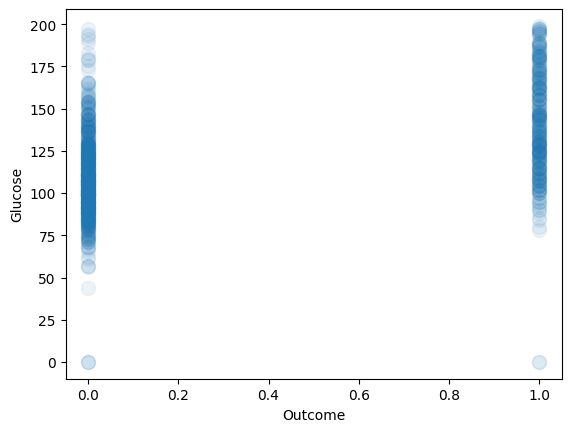

In [74]:
data.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)

plt.show()

### ***As you can see, the amount of Glucose is significant for the consequence***
***So, Let's move on and prepate our data***

# Prepare the data

In [75]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)    # Create, random train and test set


train_df_labels = train_df["Outcome"].copy()                                  # Drop labels
train_df= train_df.drop("Outcome", axis=1)



In [76]:
#Transformation Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler                       # This method makes normalization to our features

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

## Predictions

***Let's make some predictions***

#### Stochastic Gradient Descent (SGD)

In [77]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_df_labels)

SGDClassifier(random_state=42)

In [78]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.72727273, 0.67391304, 0.69130435])

In [79]:
prediction = sgd_clf.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_clf.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.6497829232995659


#### Logistic Regression

In [80]:

model = LogisticRegression()
model.fit(train_prepared, train_df_labels)

LogisticRegression()

In [81]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.77922078, 0.77391304, 0.72173913])

In [82]:
prediction = model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

LR Accuracy of Classifier:  0.7756874095513748


In [83]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(train_prepared, train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [84]:

print("SVM Accuracy of Classifier: ", poly_kernel_svm_clf.score(train_prepared, train_df_labels))

SVM Accuracy of Classifier:  0.8451519536903039


In [85]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, train_df_labels, cv=3)

### Let's look at the Confusion matrix

In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_df_labels, y_train_pred)

array([[375,  75],
       [109, 132]])

#### Precision = TP/(TP+FP)   132/(132+58)
#### Recall    = TP/(TP+FN)   132/(132+109)
#### F1 Score    = 2 x (precision x recall )/ (precision+recall)
       

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(train_df_labels, y_train_pred))
print('Recall Score:',recall_score(train_df_labels, y_train_pred))
print('F1 Score:',f1_score(train_df_labels, y_train_pred))

Precision Score: 0.6376811594202898
Recall Score: 0.5477178423236515
F1 Score: 0.5892857142857143


### ROC CURVE

In [88]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_df_labels, y_train_pred)

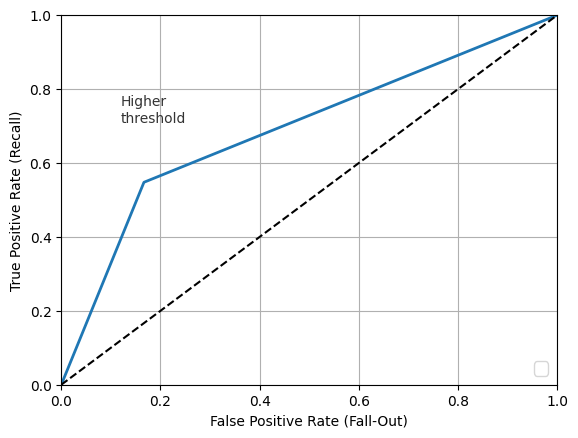

In [89]:
plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

**One way to compare classifiers is to measure the area under the curve (AUC).**

**A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC**

***Hands-on ML book***

In [90]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_df_labels, y_train_pred)

0.6905255878284924

#### Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_prepared, train_df_labels)

y_probas_forest = cross_val_predict(forest_clf, train_prepared, train_df_labels, cv= 3, method = "predict_proba")

In [92]:

prediction = forest_clf.predict(train_prepared)
print("Random Forest Classifire Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

Random Forest Classifire Accuracy of Classifier:  0.7756874095513748


In [93]:
cross_val_score(forest_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.78787879, 0.79565217, 0.73043478])

In [94]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_df_labels, y_scores_forest)

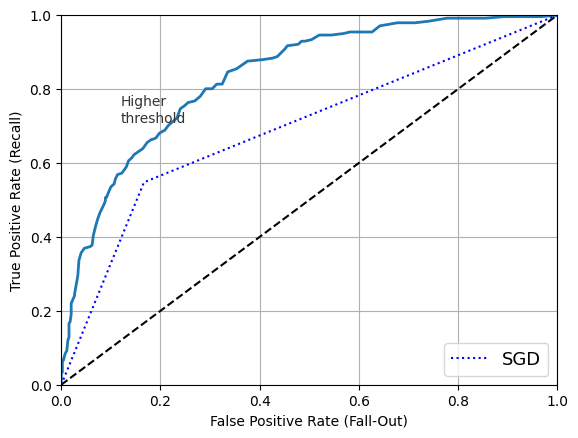

In [95]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)

plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

In [96]:
roc_auc_score(train_df_labels, y_train_pred)

0.6905255878284924